In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [26]:
df= pd.read_csv("../data/Phishing_Email.csv")
df = df.dropna()
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [27]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,8538,semantics : il dominio tempo-aspettuale il dom...,Safe Email
1,16994,http://beast.gtk.orgThere's a realy nasty shor...,Safe Email
2,15375,"On Tue, Oct 08, 2002 at 04:36:13PM +0200, Matt...",Safe Email
3,6643,re : 6 . 108 sum : words that are their own op...,Safe Email
4,5220,"URL: http://www.newsisfree.com/click/-1,862212...",Safe Email


In [28]:
X = Data["Email Text"].values
y = Data["Email Type"].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
model_pipeline = Pipeline(
    [("tfidf", TfidfVectorizer()), ("classifier", SGDClassifier())]
) 
hyper_parameters = {'classifier__max_iter': [1000,1100], 'classifier__tol': [1e-3, 1e-5]}

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SGDClassifier(tol=1e-05))]) {'classifier__max_iter': 1000, 'classifier__tol': 1e-05}
0.9765268915223336
Test Accuracy : 97.65269%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.96      0.99      0.98      2198
    Safe Email       0.99      0.96      0.98      2190

      accuracy                           0.98      4388
     macro avg       0.98      0.98      0.98      4388
  weighted avg       0.98      0.98      0.98      4388

Confusion Matrix


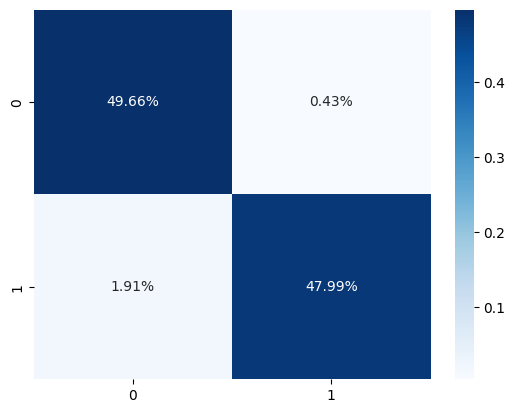

In [30]:
grid_search = GridSearchCV(model_pipeline, hyper_parameters, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)  # Fit the model with grid search

best_model = grid_search.best_estimator_
best_hyperparams = grid_search.best_params_

pred = best_model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(best_model, best_hyperparams)
print(acc)

print(f'Test Accuracy : {acc*100:.5f}%')
print('Classification Report')
print(classification_report(y_test, pred))
print('Confusion Matrix')
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()


In [31]:
import joblib 
# Save the best model using joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']